### Bitcoin Price Prediction using LSTM

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
# !pip install tensorflow

In [3]:
data = pd.read_csv('bitcoins_data.csv', date_parser=True)

In [4]:
data_train = data[data['Date']<'2021-01-01'].copy()
data_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2293,2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,26272.294922,66479895605
2294,2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,27084.808594,49056742893
2295,2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,27362.437500,45265946774
2296,2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,28840.953125,51287442704


In [5]:
data_test = data[data['Date']>'2021-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
2299,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2300,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2301,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344
2302,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782
2303,2021-01-06,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,75289433811
...,...,...,...,...,...,...,...
2819,2022-06-06,29910.283203,31693.291016,29894.187500,31370.671875,31370.671875,31947336829
2820,2022-06-07,31371.742188,31489.683594,29311.683594,31155.478516,31155.478516,40770974039
2821,2022-06-08,31151.480469,31253.691406,29944.404297,30214.355469,30214.355469,30242059107
2822,2022-06-09,30215.279297,30609.310547,30020.265625,30111.998047,30111.998047,21692004719


In [6]:
train_data = data_train.drop(['Date', 'Adj Close'], axis=1)
train_data.head()

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800
1,456.859985,456.859985,413.104004,424.440002,34483200
2,424.102997,427.834991,384.532013,394.795990,37919700
3,394.673004,423.295990,389.882996,408.903992,36863600
4,408.084991,412.425995,393.181000,398.821014,26580100


In [7]:
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
train_data

array([[1.00809442e-02, 8.83276683e-03, 1.00216614e-02, 9.68757707e-03,
        2.04208427e-04],
       [9.76682835e-03, 8.44307341e-03, 8.61897443e-03, 8.54635973e-03,
        3.85277136e-04],
       [8.62406340e-03, 7.44335419e-03, 7.59965587e-03, 7.51789714e-03,
        4.31621846e-04],
       ...,
       [9.38608635e-01, 9.35447703e-01, 9.20989823e-01, 9.43127083e-01,
        6.10377732e-01],
       [9.48316726e-01, 9.89421170e-01, 9.69964757e-01, 9.94422366e-01,
        6.91583750e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        6.30458660e-01]])

In [8]:
x_train = []
y_train = []

In [9]:
train_data.shape

(2298, 5)

In [10]:
len(train_data)

2298

In [11]:
days = 60
for i in range(days, len(train_data)):
    x_train.append(train_data[i-days:i])
    y_train.append(train_data[i,0])

In [12]:
x_train = np.array(x_train)
y_train = np.array(y_train)


In [13]:
# x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [14]:
x_train.shape

(2238, 60, 5)

### Building LSTM

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [16]:
model = Sequential()

In [17]:
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],5)))
model.add(Dropout(0.2))

In [18]:
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

In [21]:
model.add(Dense(units=1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
%%time
model.compile(optimizer='adam', loss='mean_absolute_error')
model.fit(x_train,y_train, epochs=20, batch_size=50)

Epoch 1/20
45/45 [==============================] - 12s 160ms/step - loss: 0.0601
Epoch 2/20
45/45 [==============================] - 7s 163ms/step - loss: 0.0328
Epoch 3/20
45/45 [==============================] - 7s 164ms/step - loss: 0.0325
Epoch 4/20
45/45 [==============================] - 7s 163ms/step - loss: 0.0301
Epoch 5/20
45/45 [==============================] - 7s 163ms/step - loss: 0.0316
Epoch 6/20
45/45 [==============================] - 7s 164ms/step - loss: 0.0302
Epoch 7/20
45/45 [==============================] - 7s 166ms/step - loss: 0.0280
Epoch 8/20
45/45 [==============================] - 7s 164ms/step - loss: 0.0281
Epoch 9/20
45/45 [==============================] - 7s 165ms/step - loss: 0.0272
Epoch 10/20
45/45 [==============================] - 7s 165ms/step - loss: 0.0280
Epoch 11/20
45/45 [==============================] - 7s 164ms/step - loss: 0.0262
Epoch 12/20
45/45 [==============================] - 7s 163ms/step - loss: 0.0267
Epoch 13/20
45/45 [=====

### Making predictions on test data


In [24]:
# x_test = []

In [25]:
# test_data.shape

In [26]:
past_60_days = data_train.tail(60)
df = past_60_days.append(data_test, ignore_index=True)
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,13737.032227,13808.323242,13243.160156,13550.489258,30771455468
1,13550.451172,13984.981445,13325.441406,13950.300781,29869951617
2,13950.488281,14218.766602,13580.471680,14133.707031,35116364962
3,14133.733398,15706.404297,14102.088867,15579.848633,40856321439
4,15579.729492,15903.437500,15226.839844,15565.880859,39837841971


In [27]:
inputs = scaler.transform(df)
inputs

array([[0.4730608 , 0.46831274, 0.46633697, 0.46393851, 0.41490472],
       [0.46655171, 0.47439745, 0.46927239, 0.47780948, 0.40274702],
       [0.48050746, 0.4824498 , 0.47837071, 0.48417253, 0.47350026],
       ...,
       [1.08058372, 1.06919038, 1.06216133, 1.04207087, 0.40776527],
       [1.04792327, 1.04699572, 1.06486772, 1.03851971, 0.29245906],
       [1.04342718, 1.03392055, 1.0277401 , 1.0003428 , 0.39105333]])

In [28]:
len(inputs)

585

In [29]:
x_test = []
y_test = []
for i in range(days, len(inputs)):
    x_test.append(inputs[i-days:i])
    y_test.append(inputs[i,0])

In [30]:
y_test

[1.0186599296183372,
 1.1146998432826734,
 1.1384761799390881,
 1.1093843399419552,
 1.1804324892132243,
 1.278820540037585,
 1.3677066142060914,
 1.4167870552457524,
 1.3981431378215017,
 1.3315912807866916,
 1.232857502844057,
 1.1769964767732697,
 1.295957812203799,
 1.3598551881440633,
 1.2783940024419216,
 1.255438920999649,
 1.242481853544929,
 1.2721349379790394,
 1.251478117415637,
 1.234010108270294,
 1.0689367881727352,
 1.1445745773651372,
 1.112431153860116,
 1.1201557088353828,
 1.1226959241874481,
 1.1298620964795743,
 1.0557992258153135,
 1.191074806636015,
 1.1902815557272748,
 1.1894074943411455,
 1.1490686210807246,
 1.1636726960054729,
 1.2326642663230822,
 1.3011905972312365,
 1.2822279349391723,
 1.3243299211109967,
 1.3631164973259855,
 1.3504401542952484,
 1.6050449421884898,
 1.6149794524956653,
 1.560171551836791,
 1.6640737934825331,
 1.6506136024485192,
 1.6374721562823191,
 1.692662986859345,
 1.666425882588332,
 1.7104808113427292,
 1.812826122627304,
 1.79

In [31]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [32]:
# x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [33]:
x_test.shape

(525, 60, 5)

In [34]:
preds = model.predict(x_test)

17/17 [==============================] - 1s 34ms/step


In [35]:
scaler.scale_

array([3.48861420e-05, 3.44433911e-05, 3.56754476e-05, 3.46937713e-05,
       1.34860207e-11])

In [36]:
scale = 1/scaler.scale_[0]
scale

28664.677215576172

In [37]:
y_test = y_test * scale
preds = preds * scale

In [40]:
y_test

array([29199.55807495, 31952.51119995, 32634.05221558, 31800.14401245,
       33836.71627808, 36656.97799683, 39204.86862183, 40611.74362183,
       40077.32174683, 38169.63424683, 35339.46237183, 33738.22409058,
       37148.21237183, 38979.81002808, 36644.75143433, 35986.75143433,
       35615.34127808, 36465.33737183, 35873.21627808, 35372.50143433,
       30640.72799683, 32808.86080933, 31887.47994995, 32108.90182495,
       32181.71627808, 32387.1322937 , 30264.14401245, 34141.77487183,
       34119.03659058, 34093.98190308, 32937.68112183, 33356.30221558,
       35333.92330933, 37298.20846558, 36754.64987183, 37961.48971558,
       39073.29440308, 38709.93112183, 46008.09518433, 46292.86471558,
       44721.81393433, 47700.13815308, 47314.30612183, 46937.61080933,
       48519.63815308, 47767.56002808, 49030.38034058, 51964.07565308,
       51499.08346558, 55710.43893433, 55891.66940308, 57355.84127808,
       54028.03268433, 48658.18893433, 49532.18502808, 47003.56784058,
      

In [41]:
preds

array([[  22246.346],
       [  22950.744],
       [  23924.121],
       [  24984.314],
       [  25959.605],
       [  26955.273],
       [  28178.334],
       [  29668.254],
       [  31174.932],
       [  32386.564],
       [  32939.934],
       [  32738.41 ],
       [  32162.66 ],
       [  31678.69 ],
       [  31406.348],
       [  31309.998],
       [  31288.252],
       [  31337.693],
       [  31501.39 ],
       [  31682.285],
       [  31657.527],
       [  31366.531],
       [  30897.234],
       [  30381.727],
       [  29969.396],
       [  29670.902],
       [  29410.012],
       [  29242.164],
       [  29397.604],
       [  29663.648],
       [  29918.023],
       [  30140.709],
       [  30396.541],
       [  30810.043],
       [  31427.164],
       [  32121.818],
       [  32948.434],
       [  33730.55 ],
       [  34786.39 ],
       [  36383.066],
       [  38133.434],
       [  39728.406],
       [  41106.97 ],
       [  42145.324],
       [  43024.08 ],
       [  

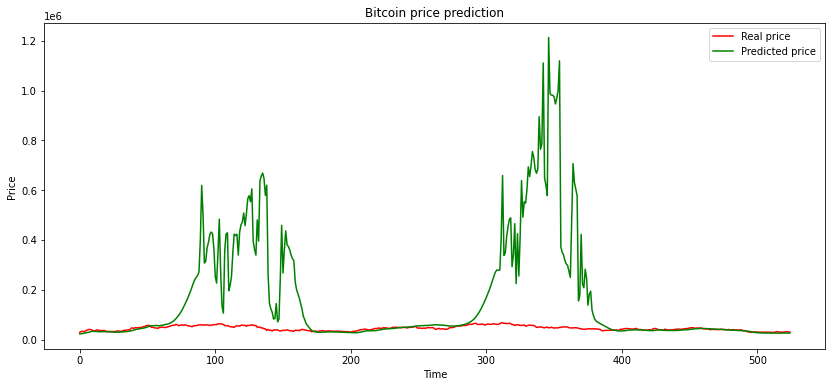

In [42]:
plt.figure(figsize=(14,6))
plt.plot(y_test, color='red',label='Real price')
plt.plot(preds, color='green', label='Predicted price')
plt.title('Bitcoin price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()